# Xử lí và trực quan hóa dữ liệu wine quality

# Xử lí dữ liệu 

## Nhập thư viện cần thiết 

In [49]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)
print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))



 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


### Đọc dataset và xem 5 dòng đầu của dữ liệu

In [48]:
wine_data = pd.read_csv("winequality-red.csv")
df = wine_data.copy()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Thông tin của dữ liệu

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Bảng mô tả thông tin theo chiều dọc của dataset

In [51]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

#### Thông tin trên thống kê

+ Giá trị trung bình của độ axit cố định (fixed acidity) là 8.31, giá trị cao nhất là 15.9

+ Giá trị trung bình của độ axit bay hơi (volatile acidity) là 0.52, giá trị cao nhất là 1.58

+ Giá trị trung bình của axit citric (citric acid) là 0.27, giá trị cao nhất là 1

+ Giá trị trung bình của lượng đường dư (residual sugar) là 2.53, giá trị cao nhất là 15.5

+ Giá trị trung bình của clorua (chlorides) là 0.08, giá trị cao nhất là 0.61

+ Giá trị trung bình của lưu huỳnh dioxit tự do (free sulfur dioxide) là 15.87, giá trị cao nhất là 72

+ Giá trị trung bình của tổng lượng lưu huỳnh dioxit (total sulfur dioxide) là 46.46, giá trị cao nhất là 289

+ Giá trị trung bình của mật độ (density) là 0.99, giá trị cao nhất là 1

+ Giá trị trung bình của độ pH là 3.31, giá trị cao nhất là 4.01

+ Giá trị trung bình của sunfat (sulphates) là 0.65, giá trị cao nhất là 2

+ Giá trị trung bình của hàm lượng cồn (alcohol) là 10.42, giá trị cao nhất là 14.90

+ Giá trị trung bình của chất lượng (quality) là 5.63, giá trị cao nhất là 8

### Kiểm tra giá trị bị thiếu 

In [4]:
print("tong cong co {} gia tri rong trong dataset".format(df.isnull().sum().sum()))

tong cong co 0 gia tri rong trong dataset


#### Tập dữ liệu không có giá trị bị thiếu (null). Tập dữ liệu gồm 1599 dòng và 12 cột. Kiểu dữ liệu của tất cả các biến đều là dạng số (numeric).

### Đổi tên các cột trong DataFrame df

In [5]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

# Trực quan hóa dữ liệu 

#### Biểu đồ histogram

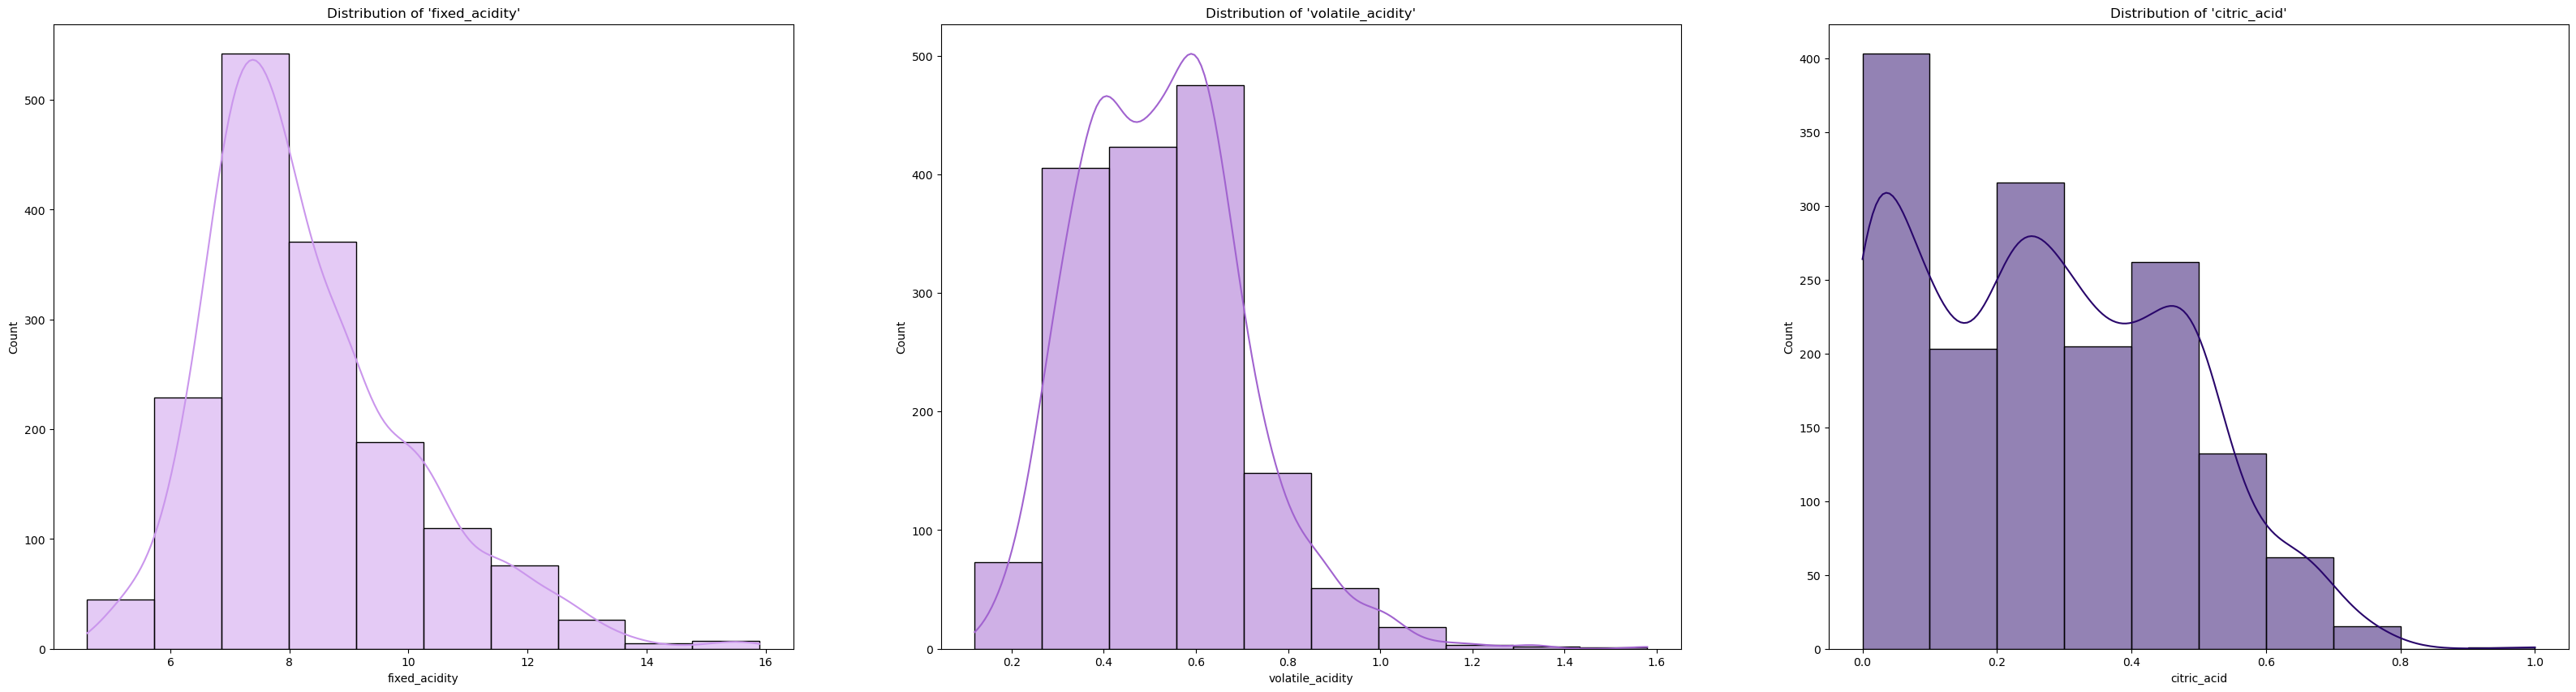

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

#### Phân phối

+ Phân tích các biểu đồ ở đây cho thấy rằng giá trị của biến fixed_acidity phân bố tương đối theo phân phối chuẩn (nhưng hơi lệch trái). Tuy nhiên, có hai đỉnh trong phân phối của các biến volatile_acidity và citric_acid.

#### Biểu đồ 

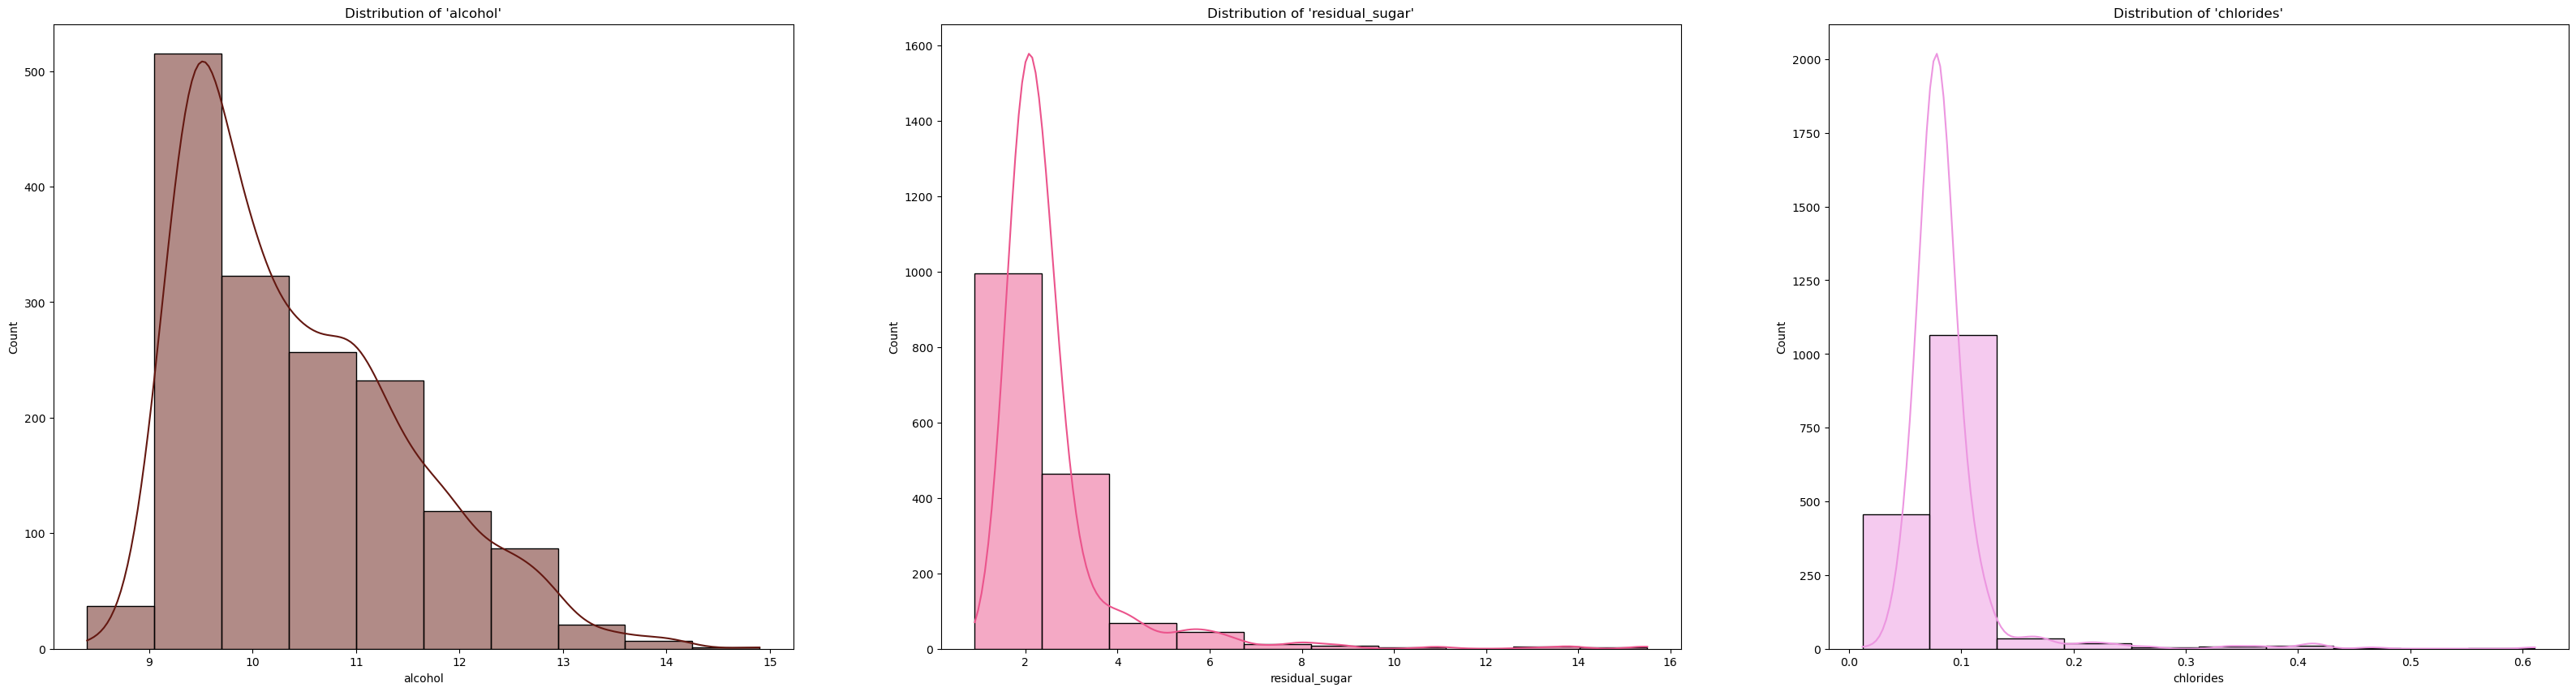

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual_sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

#### Phân phối

+ Phân tích các biểu đồ ở đây cho thấy phân phối của các biến này không tuân theo phân phối chuẩn.

#### Biểu đồ pairplot

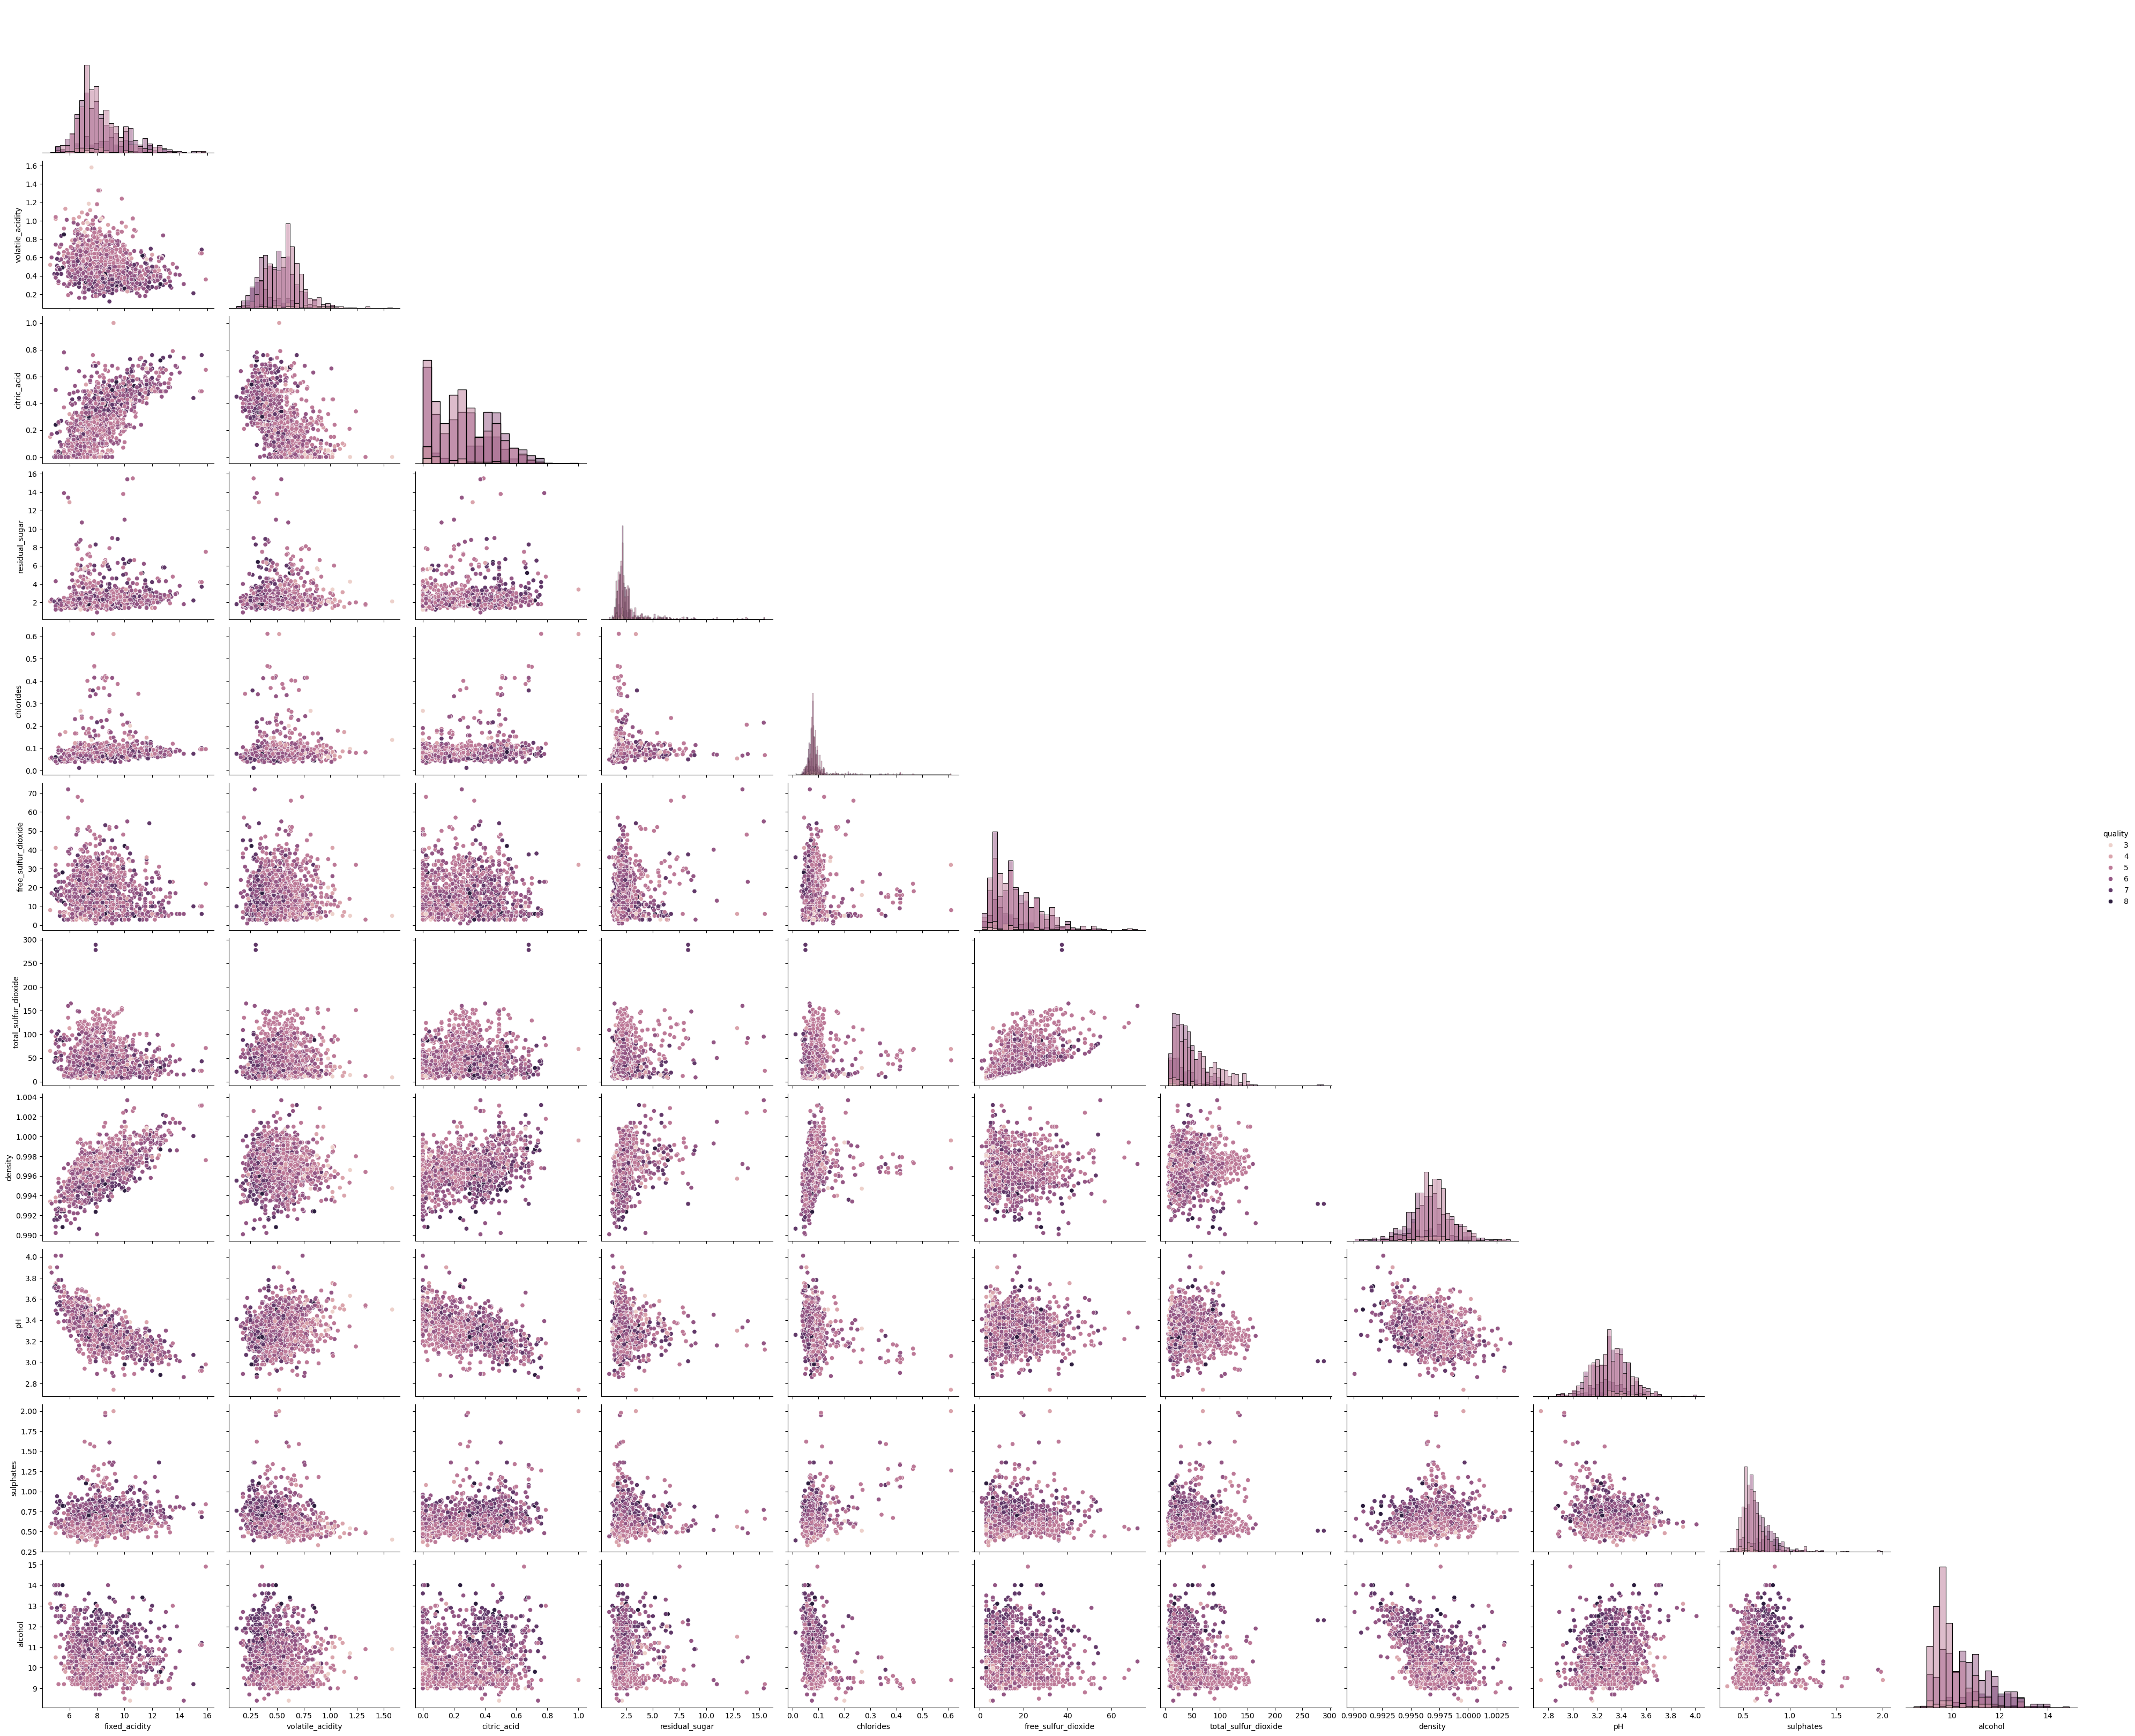

In [8]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

#### Phát hiện đa cộng tuyến!

+ Ở đây chúng ta thấy có sự tương quan giữa một số biến. Và đây là điều mà chúng ta không mong muốn. Vấn đề này được gọi là đa cộng tuyến (multicollinearity).

#### Biểu đồ phân tán 

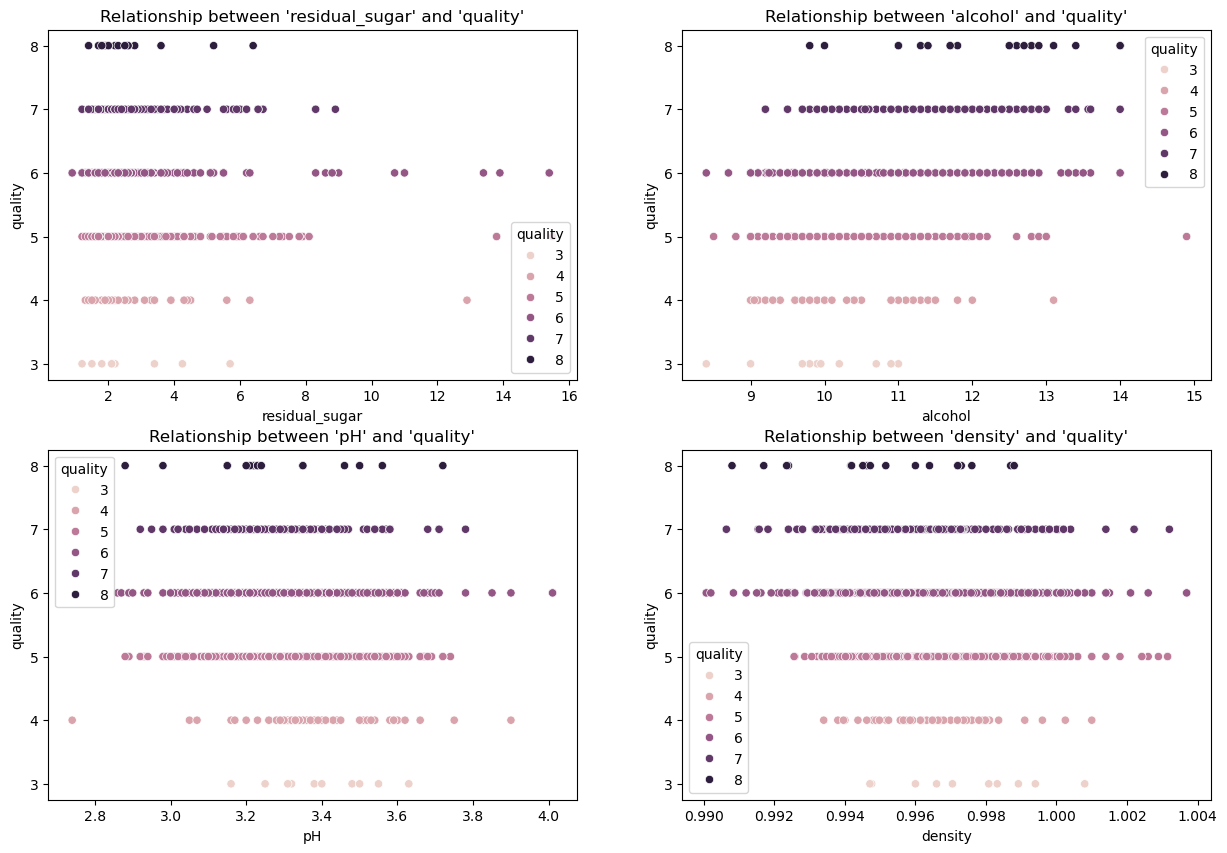

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");


#### Kết luận:

+ Các biểu đồ scatter thể hiện mối quan hệ giữa các biến residual_sugar, alcohol, pH, density với quality. Trong đó:

+ alcohol có xu hướng tăng theo chất lượng rượu (quality tăng thì alcohol cũng tăng).

+ Các biến còn lại (residual_sugar, pH, density) không cho thấy mối quan hệ rõ ràng hoặc tuyến tính với chất lượng rượu.

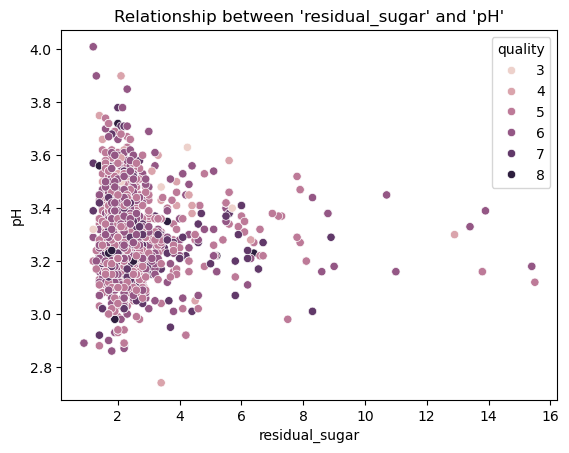

In [10]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

#### Như có thể thấy, không có sự tương quan giữa hai biến 'residual_sugar' và 'pH'.

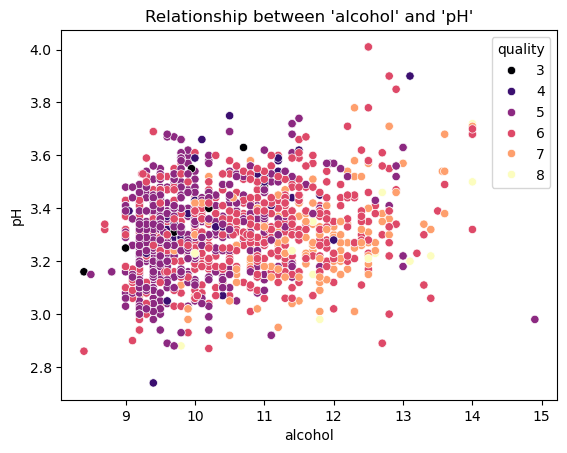

In [11]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

#### Như có thể thấy, không có sự tương quan giữa hai biến 'alcohol' và 'pH'.

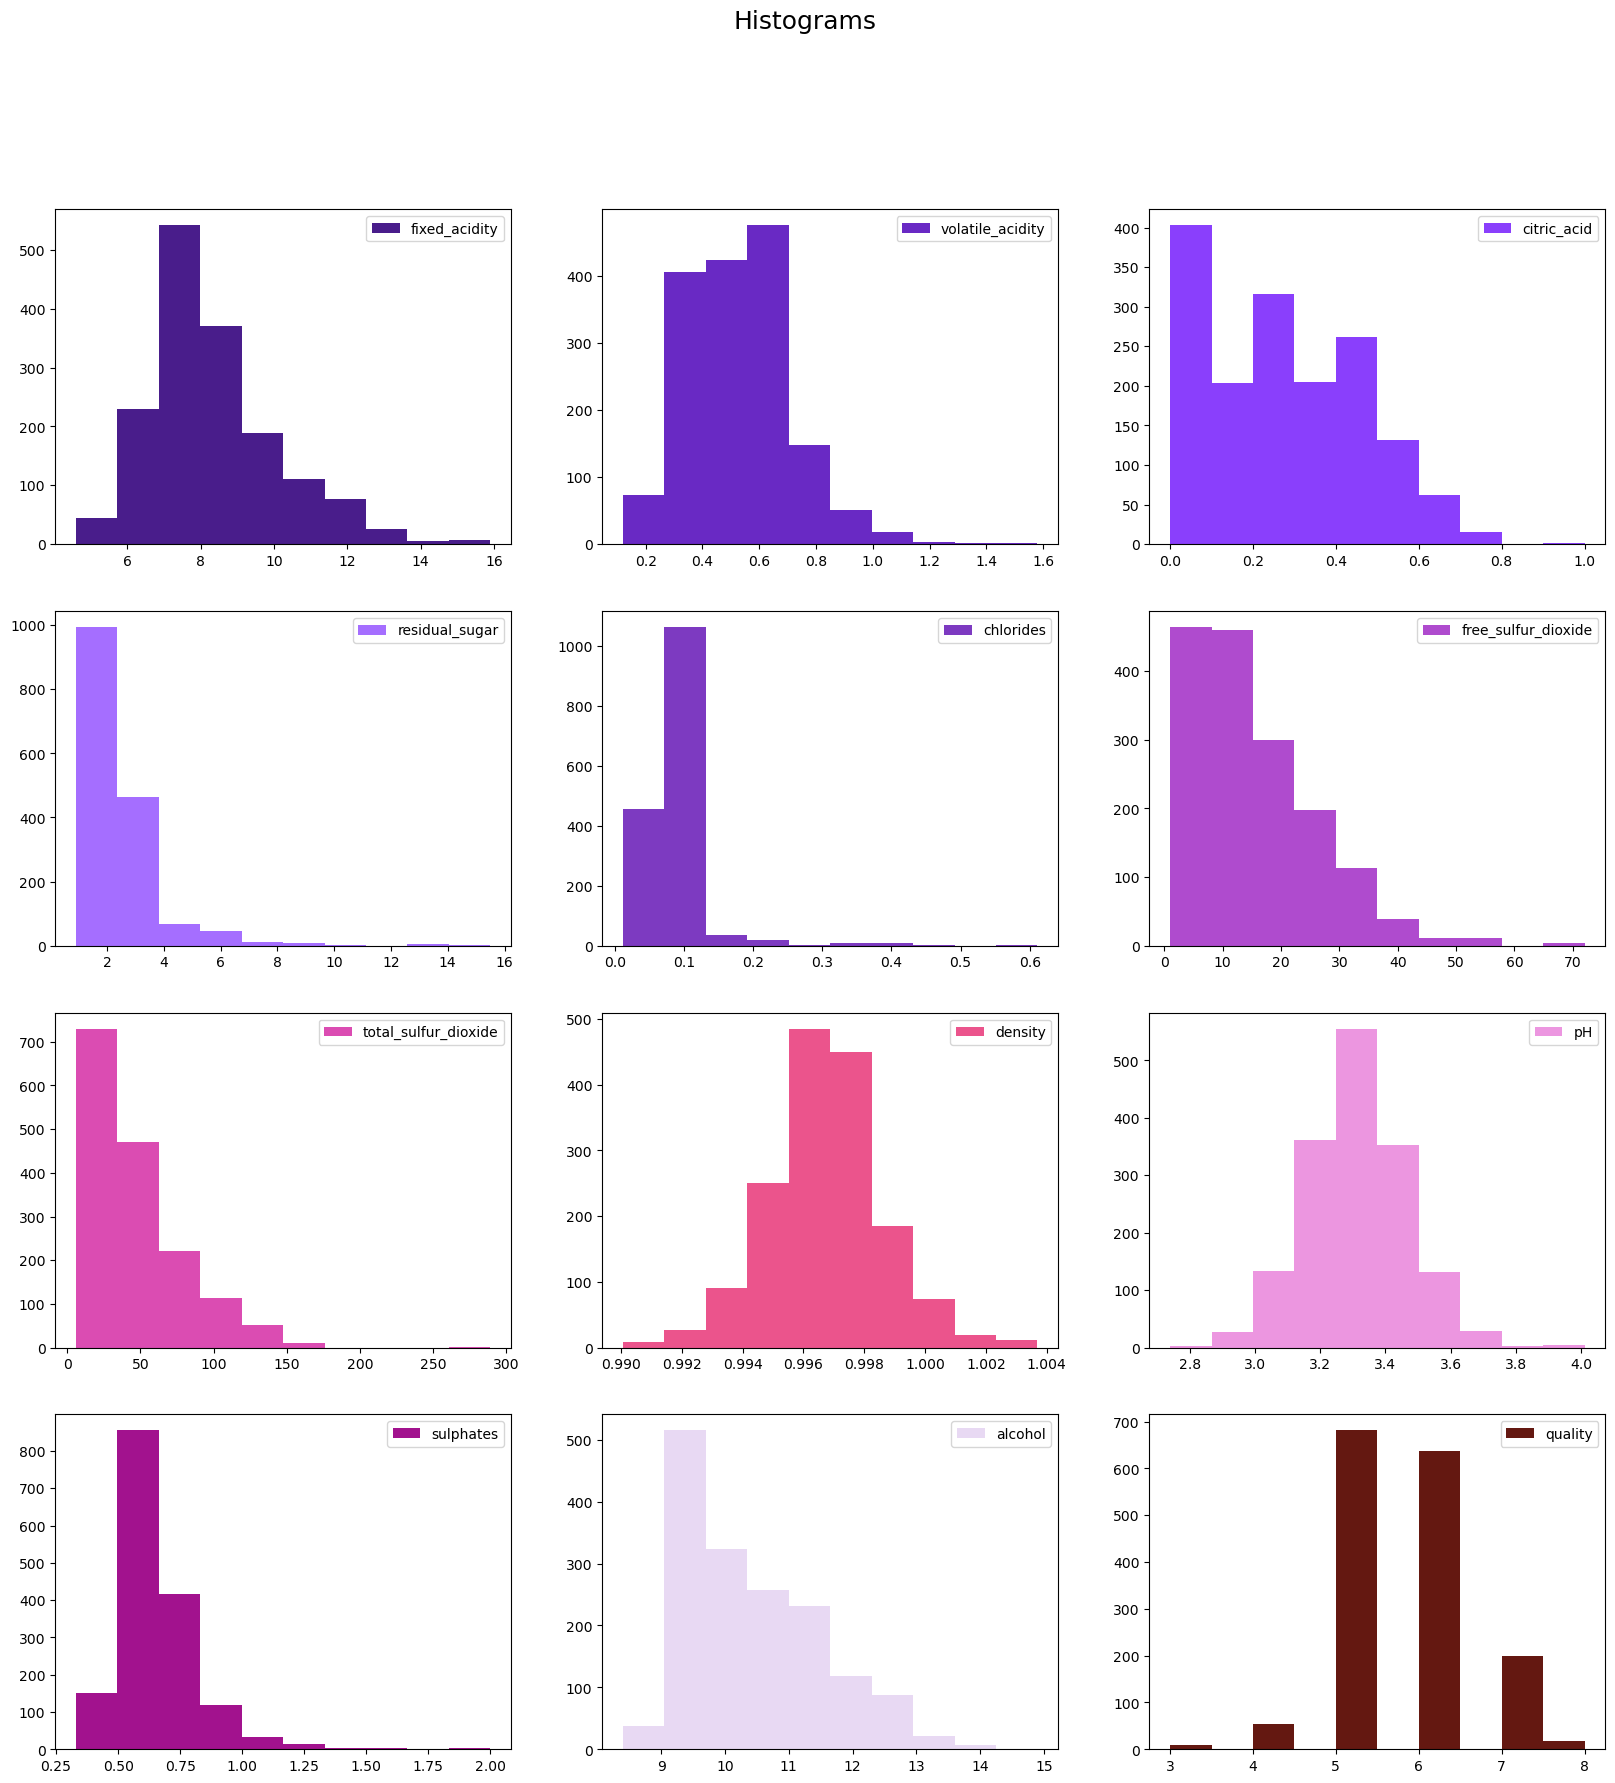

In [12]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()


#### Khi quan sát các biểu đồ histogram phía trên 

+ Ở đây ta thấy phân phối giá trị của tất cả các biến. Như có thể thấy từ các biểu đồ, các biến pH và density có phân phối tương đối chuẩn.

+ Phần lớn giá trị của biến fixed_acidity nằm trong khoảng từ 7 đến 8;

+ Phần lớn giá trị của biến volatile_acidity nằm trong khoảng từ 0.4 đến 0.7;

+ Phần lớn giá trị của biến citric_acid nằm trong khoảng từ 0.0 đến 0.1;

+ Phần lớn giá trị của biến residual_sugar nằm trong khoảng từ 1 đến 2.5;

+ Phần lớn giá trị của biến chlorides nằm trong khoảng từ 0.085 đến 0.15;

+ Phần lớn giá trị của biến free_sulfur_dioxide nằm trong khoảng từ 0 đến 15;

+ Phần lớn giá trị của biến total_sulfur_dioxide nằm trong khoảng từ 0 đến 30;

+ Phần lớn giá trị của biến density nằm trong khoảng từ 0.996 đến 0.998;

+ Phần lớn giá trị của biến pH nằm trong khoảng từ 3.2 đến 3.4;

+ Phần lớn giá trị của biến sulphates nằm trong khoảng từ 0.50 đến 0.75;

+ Phần lớn giá trị của biến alcohol nằm trong khoảng từ 9 đến 10;

+ Phần lớn giá trị của biến quality là 5 và 6.

#### Phân phối mật độ Kernel mượt mà kèm biểu đồ histogram biên
 + Trong các biểu đồ mật độ bên dưới, chúng ta sẽ quan sát mối quan hệ giữa một số biến. Ngoài ra, chúng ta cũng sẽ sử dụng các biểu đồ histogram biên (marginal histograms).

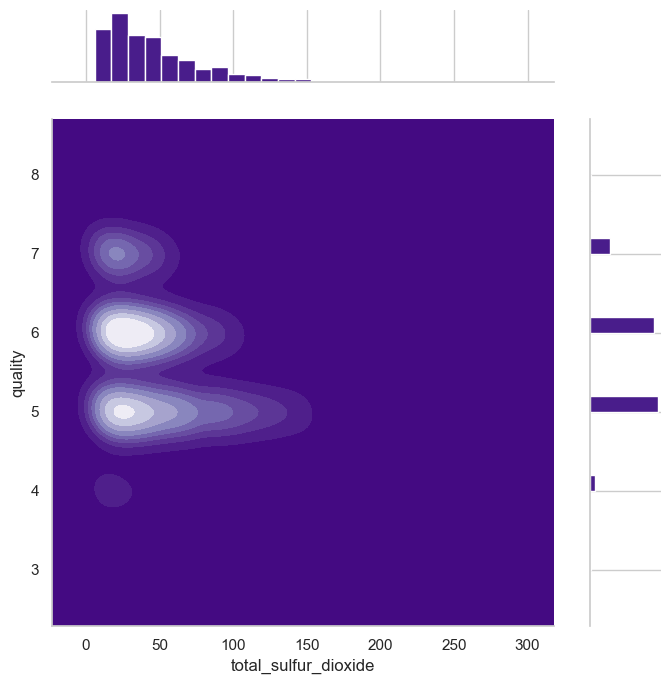

In [18]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df, height = 7, x = "total_sulfur_dioxide", y = "quality", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Purples_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25);

#### Kết luận:

+ Biểu đồ thể hiện mối quan hệ giữa total_sulfur_dioxide và quality.

+ Phần mật độ (kdeplot) cho thấy vùng dữ liệu tập trung, giúp nhìn rõ cách total_sulfur_dioxide phân bố theo các mức quality.

+ Biểu đồ histogram ở biên (marginals) thể hiện phân phối riêng lẻ của từng biến.

+ Sự phân bố và xu hướng thay đổi của lượng sulfur dioxide tổng theo chất lượng rượu.

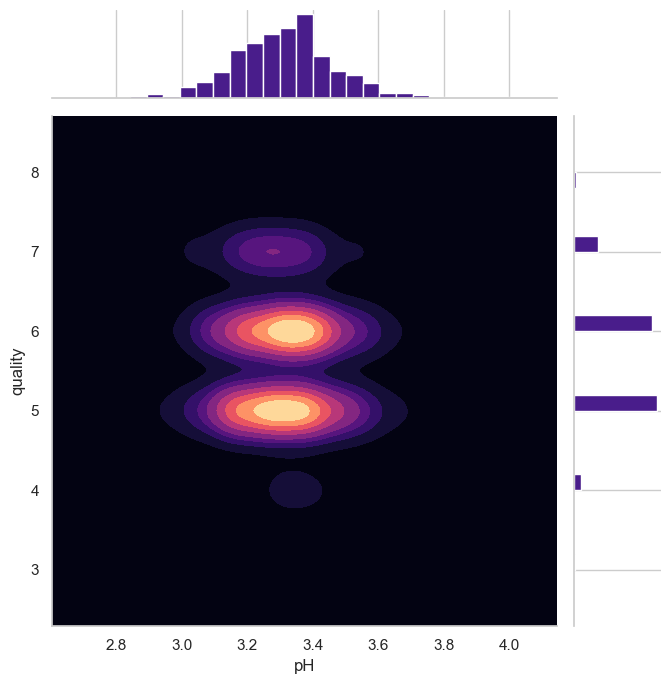

In [20]:
g = sns.JointGrid(data = df, x = "pH", y = "quality", height = 7, space = 0.2)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "magma")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25);

#### Kết luận:

+ Biểu đồ thể hiện mối quan hệ giữa pH và quality trong dataset.

+ Phần kdeplot ở giữa cho thấy mật độ phân bố của dữ liệu theo hai biến này, giúp nhận biết vùng tập trung giá trị pH tương ứng với các mức chất lượng rượu.

+ Các biểu đồ histogram ở biên thể hiện phân phối riêng biệt của pH và quality.

+ Không thấy mối liên hệ mạnh giữa pH và chất lượng rượu

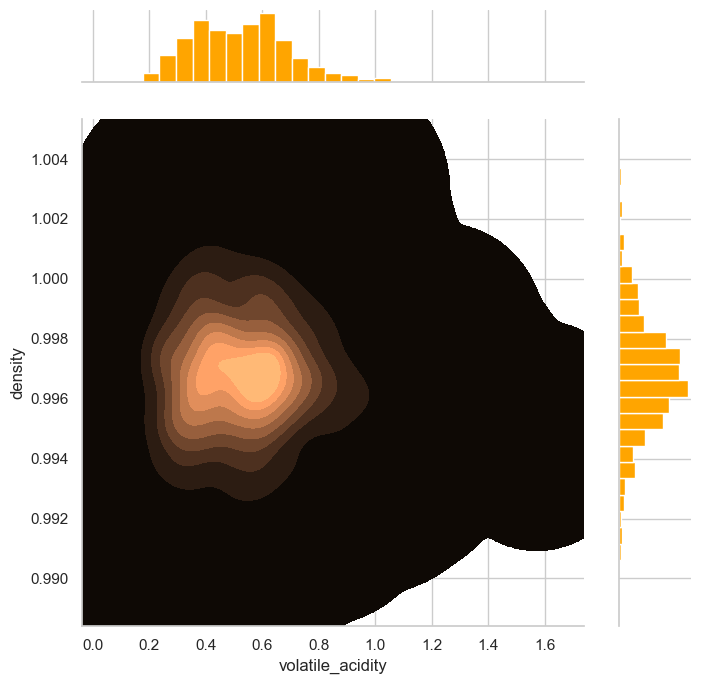

In [21]:
g = sns.JointGrid(data = df, x = "volatile_acidity", y = "density", height = 7, space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "copper")
g.plot_marginals(sns.histplot, color = "#FFA500", alpha = 1, bins = 25);


#### Kết luận:

+ Biểu đồ thể hiện mối quan hệ giữa volatile_acidity và density trong dataset.

+ Phần kdeplot hiển thị mật độ phân bố dữ liệu, cho thấy cách hai biến này phân bố và vùng tập trung giá trị chung.

+ Các histogram biên cho thấy phân phối riêng biệt của volatile_acidity và density.

+ Không có mối liên hệ rõ ràng mạnh giữa hai biến này.

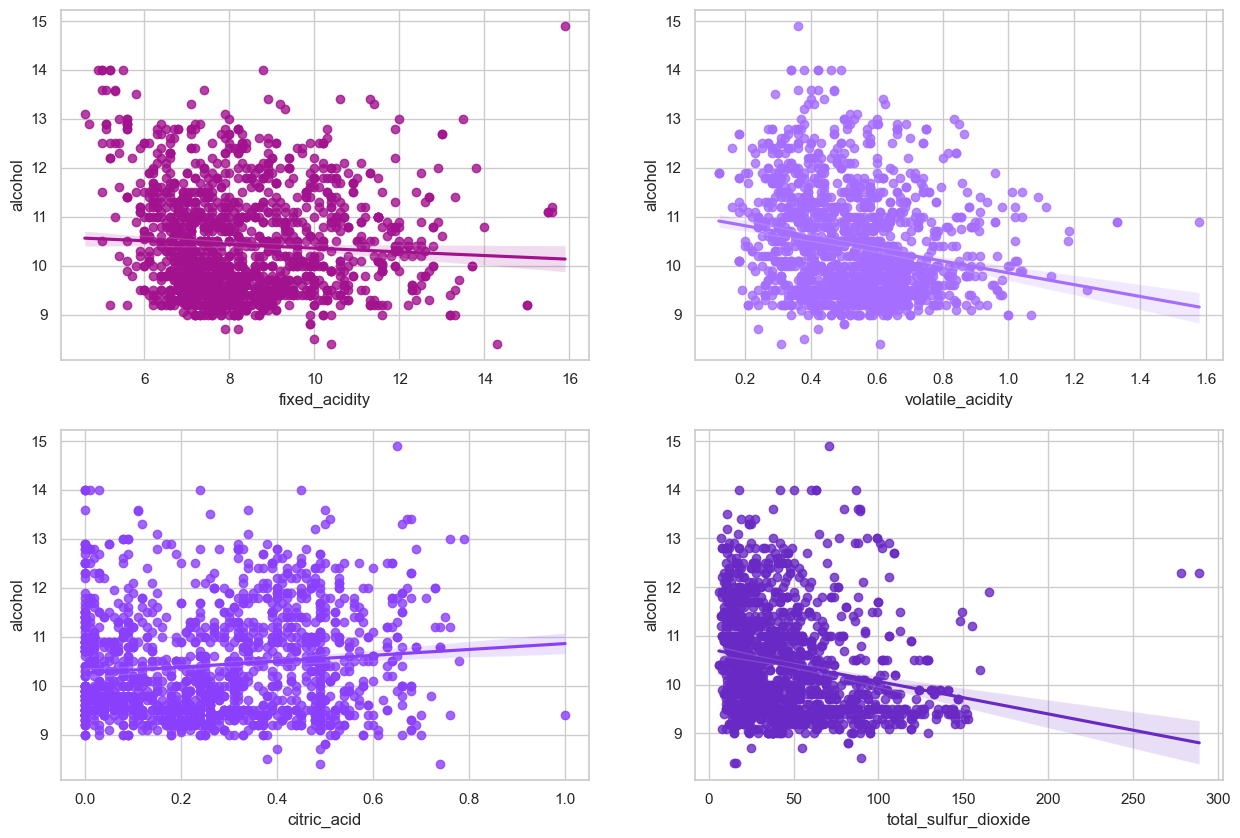

In [27]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed_acidity", y = "alcohol", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "volatile_acidity", y = "alcohol", data = df, color = "#A56EFF");
sns.regplot(ax = axes[2], x = "citric_acid", y = "alcohol", data = df, color = "#8A3FFC");
sns.regplot(ax = axes[3], x = "total_sulfur_dioxide", y = "alcohol", data = df, color = "#6929C4");

#### Mối quan hệ tuyến tính âm cần được chú ý giữa các biến "alcohol" – "volatile acidity" và "alcohol" – "total_sulfur_dioxide". 

#### Biểu đồ Binning Lục giác (Hexagonal Binned Plot)

+ Hexbin là một biểu đồ histogram 2 chiều, trong đó các ô (bins) có hình lục giác và màu sắc biểu thị số lượng điểm dữ liệu nằm trong mỗi ô.

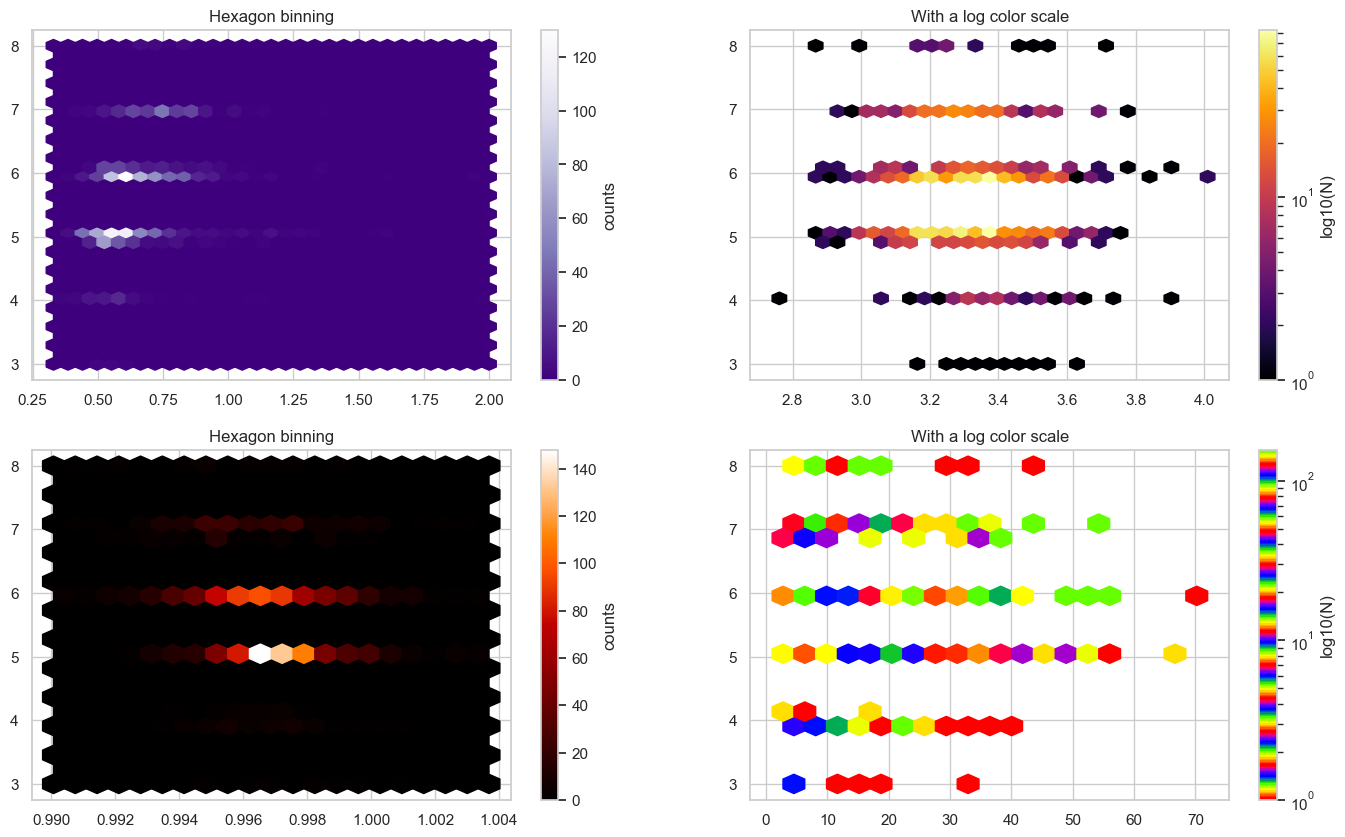

In [26]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

hb = ax0.hexbin(df["sulphates"], df["quality"], gridsize = 30, cmap = 'Purples_r')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df["pH"], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df["density"], df["quality"], gridsize = 20, cmap = 'gist_heat')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df["free_sulfur_dioxide"], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')

plt.show()

#### Kết luận:

+ Vẽ 4 biểu đồ hexbin thể hiện mối quan hệ giữa các biến:

+ sulphates vs quality

+ pH vs quality (với thang màu logarit)

+ density vs quality

+ free_sulfur_dioxide vs quality (với thang màu logarit)

+ Màu sắc trong mỗi lục giác biểu thị số lượng điểm dữ liệu trong vùng đó, giúp nhận biết mật độ phân bố và xu hướng giữa biến đầu vào và chất lượng rượu.

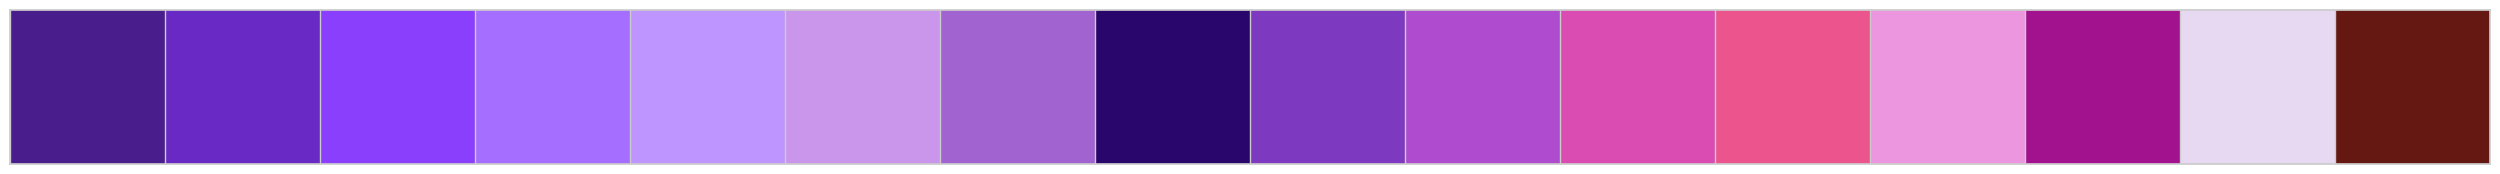

In [28]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

#### Trực quan hóa với Plotly Express

In [29]:
fig = px.histogram(df, x = "residual_sugar", y = "quality", marginal = "box",
                   color = None, text_auto = True, hover_data  = df.columns)
fig.show()


#### Kết luận:

+ Biểu đồ histogram thể hiện phân phối của residual_sugar theo từng mức quality.

+ Có thêm biểu đồ boxplot biên (marginal = "box") giúp quan sát chi tiết phân bố và ngoại lệ của residual_sugar.

+ Khi di chuột, hiển thị thông tin chi tiết của các cột trong dataset (hover_data).

In [30]:
fig = px.density_heatmap(df, x = "pH", y = "quality", z = "residual_sugar",
                         color_continuous_scale = "magma", text_auto = True)
fig.show()

#### Kết luận:

+ Biểu đồ density heatmap thể hiện mối quan hệ ba chiều giữa pH (trục x), quality (trục y) và giá trị trung bình của residual_sugar (bằng màu sắc).

+ Màu sắc càng đậm thể hiện lượng đường dư (residual_sugar) càng cao ở vùng đó.

+ Giúp quan sát vùng nào có sự kết hợp đặc trưng của pH, chất lượng rượu và lượng đường dư.

In [31]:
fig = px.density_heatmap(df, x = "density", y = "quality", z = "chlorides",
                        color_continuous_scale = "Viridis", text_auto = True)
fig.show()

#### Kết luận:

+ Biểu đồ density heatmap thể hiện mối quan hệ giữa density (trục x), quality (trục y) và mức trung bình của chlorides (bằng màu sắc).

+ Màu sắc càng đậm thể hiện lượng chlorides càng cao trong vùng dữ liệu tương ứng.

+ Giúp quan sát sự phân bố của muối clorua liên quan đến mật độ và chất lượng rượu.

In [32]:
fig = px.density_heatmap(df, x = "chlorides", y = "quality", text_auto = True,
                         color_continuous_scale = "sunsetdark")
fig.show()

#### Kết luận:

+ Biểu đồ density heatmap hiển thị mối quan hệ giữa chlorides (trục x) và quality (trục y).

+ Màu sắc thể hiện mật độ dữ liệu tại các vùng khác nhau, vùng màu đậm hơn có nhiều điểm dữ liệu hơn.

+ Giúp ta thấy phân bố của nồng độ chlorides theo các mức chất lượng rượu.

In [33]:
data = df
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

#### Kết luận:

+ Biểu đồ Surface 3D được tạo ra từ toàn bộ dữ liệu trong df (dưới dạng ma trận giá trị).

+ Biểu đồ hiển thị một bề mặt 3 chiều thể hiện biến động của các giá trị dữ liệu theo chỉ số hàng và cột.

+ Giúp quan sát tổng thể phân bố dữ liệu và sự thay đổi giữa các biến trong dataset.

In [34]:
data = df[["residual_sugar", "density", "sulphates", "chlorides", "quality"]]

fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

#### Kết luận:

+ Biểu đồ Surface 3D được vẽ dựa trên dữ liệu của các biến:
residual_sugar, density, sulphates, chlorides, và quality.

+ Biểu đồ thể hiện bề mặt 3D mô phỏng sự thay đổi giá trị của các biến này theo thứ tự trong dataset.

+ Giúp trực quan hóa đồng thời xu hướng và mối quan hệ phức tạp giữa các biến đã chọn.

In [35]:
subject = df["quality"]
score = df["alcohol"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

#### Kết luận:

+ Biểu đồ scatter plot hiển thị mối quan hệ giữa quality (trục x) và alcohol (trục y).

+ Các điểm dữ liệu được nhóm theo giá trị quality, giúp quan sát sự phân bố lượng cồn theo từng mức chất lượng rượu.

In [36]:
subject = df["quality"]
score = df["pH"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

#### Kết luận:

+ Biểu đồ scatter plot thể hiện mối quan hệ giữa quality (trục x) và pH (trục y).

+ Các điểm dữ liệu được nhóm theo từng mức quality, giúp quan sát sự phân bố giá trị pH tương ứng với chất lượng rượu.

In [37]:
subject = df["quality"]
score = df["chlorides"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

#### Kết luận:

+ Biểu đồ scatter plot thể hiện mối quan hệ giữa quality (trục x) và chlorides (trục y).

+ Các điểm dữ liệu được nhóm theo từng mức quality, giúp quan sát sự phân bố nồng độ chlorides theo từng cấp độ chất lượng rượu.

In [38]:
fig = px.ecdf(df, x = "alcohol", log_x = True, log_y = True, color = "quality")
fig.show()

#### Kết luận:

+ Biểu đồ ECDF (Empirical Cumulative Distribution Function) hiển thị phân phối tích lũy của biến alcohol trên thang logarit cả trục x và y, được phân nhóm theo các mức quality.

+ Giúp quan sát sự phân bố và tỷ lệ phần trăm mẫu có nồng độ cồn dưới các giá trị khác nhau trong từng nhóm chất lượng rượu.

In [39]:
fig = px.ecdf(df, x = "citric_acid", log_x = True, log_y = True, color = "quality")
fig.show()

#### Kết luận:

+ Biểu đồ ECDF hiển thị phân phối tích lũy của biến citric_acid trên trục x và y đều ở dạng logarit, phân nhóm theo quality.

+ Giúp quan sát tỷ lệ phần trăm mẫu có lượng axit citric dưới các mức khác nhau trong từng nhóm chất lượng rượu.

In [ ]:
fig = px.ecdf(df, x = ["pH", "sulphates", "alcohol"],
              marginal = "histogram", markers = False)
fig.show()

#### Kết luận:

+ Biểu đồ ECDF đồng thời hiển thị phân phối tích lũy của ba biến pH, sulphates, và alcohol.

+ Có thêm các biểu đồ histogram ở biên giúp quan sát chi tiết phân bố giá trị của từng biến.

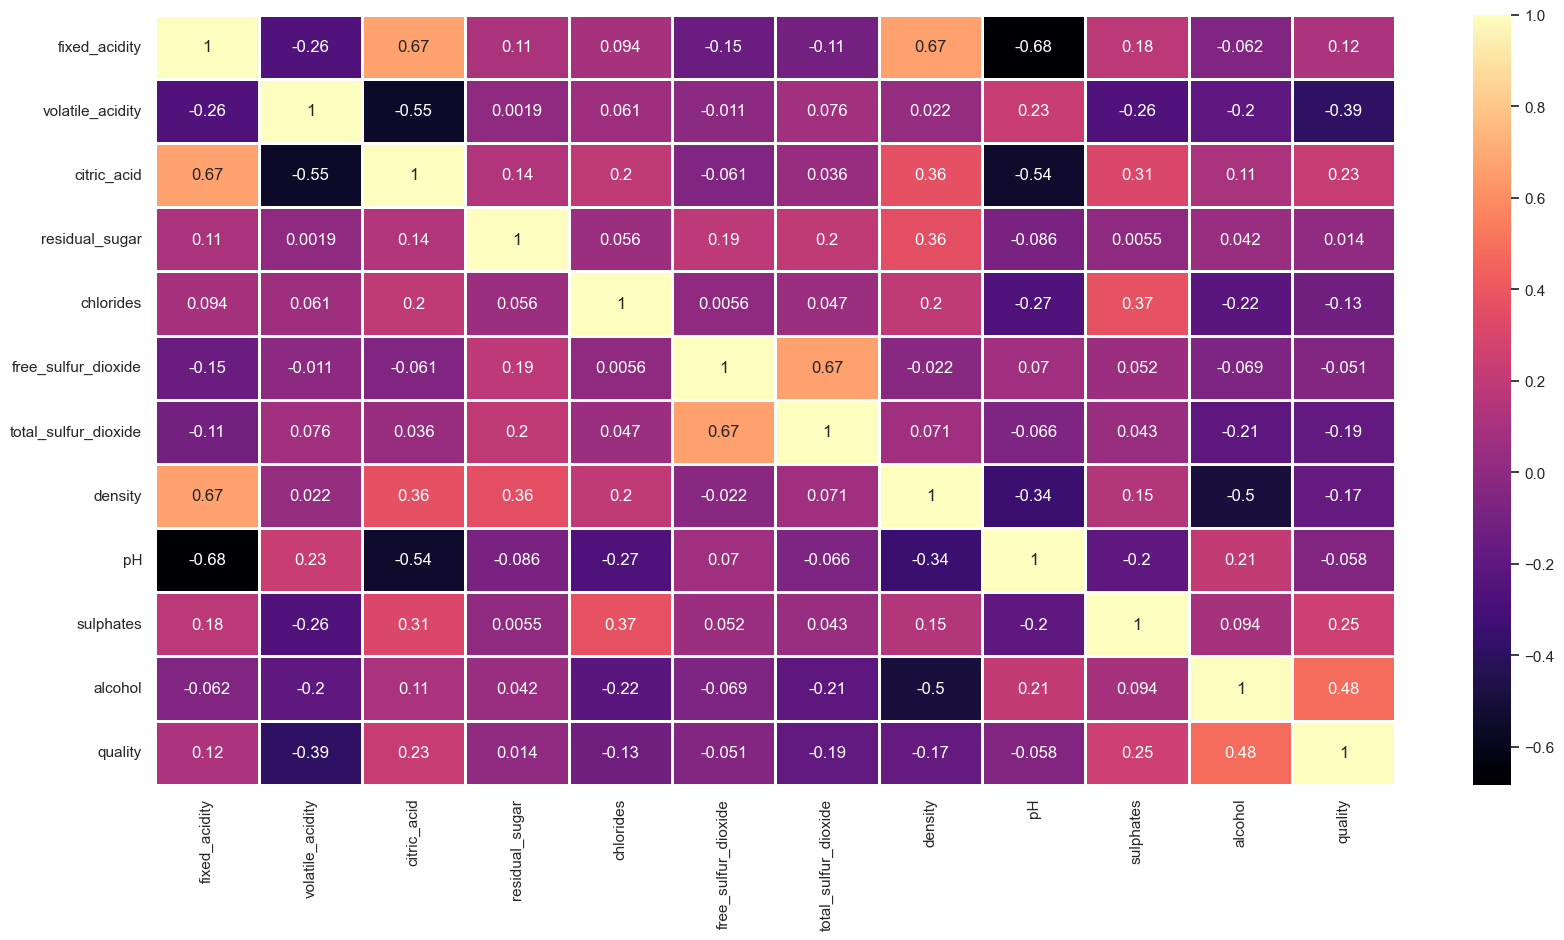

In [41]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

#### Tương quan

+ LƯU Ý QUAN TRỌNG! Có vấn đề về 'đa cộng tuyến' (multicollinearity).

+ Ở đây, ta thấy có sự tương quan khá cao (0.67, dương) giữa các biến 'free sulfur dioxide' và 'total_sulfur_dioxide'.

+ Có sự tương quan khá cao (-0.68, âm) giữa các biến "pH" và "fixed_acidity".

+ Và có khoảng 0.5 tương quan giữa một số biến khác.

+ Vì vậy, chúng ta cần cân nhắc điều này khi xây dựng các mô hình Machine Learning.

#### In ra hệ số tương quan giữa các cặp biến

In [42]:
list = (df[["alcohol","density"]].corr(), df[["fixed_acidity","pH"]].corr(),
        df[["citric_acid","pH"]].corr(), df[["fixed_acidity","density"]].corr(),
        df[["free_sulfur_dioxide","total_sulfur_dioxide"]].corr())
for corr in list:
    print(corr, "\n\n")

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 


               fixed_acidity        pH
fixed_acidity       1.000000 -0.682978
pH                 -0.682978  1.000000 


             citric_acid        pH
citric_acid     1.000000 -0.541904
pH             -0.541904  1.000000 


               fixed_acidity   density
fixed_acidity       1.000000  0.668047
density             0.668047  1.000000 


                      free_sulfur_dioxide  total_sulfur_dioxide
free_sulfur_dioxide              1.000000              0.667666
total_sulfur_dioxide             0.667666              1.000000 




#### Tính hệ số tương quan Pearson giữa các biến trong danh sách trên 

In [43]:
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.4961797702417017), pvalue=np.float64(3.9388353399881845e-100))


In [44]:
print("Pearson correlation coefficient:", st.pearsonr(df["free_sulfur_dioxide"],
                                                      df["total_sulfur_dioxide"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6676664504810216), pvalue=np.float64(6.40472295468106e-207))


In [45]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.6829781945685313), pvalue=np.float64(4.063034039843752e-220))


In [46]:
print("Pearson correlation coefficient:", st.pearsonr(df["citric_acid"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.5419041447395097), pvalue=np.float64(1.007201325911493e-122))


In [47]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6680472921189737), pvalue=np.float64(3.0747470608600757e-207))
